**Fichier de test :**

- A partir d'un signal de parole bruité et d'un masque généré par notre modèle deep. Créer le signal de parole débruité.

In [45]:
from pathlib import Path
from mask import  compute_binary_mask, compute_soft_mask
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display
from modules import *

In [46]:
class Param_stft():
    def __init__(self) -> None:
        self.n_fft = 2048
        self.n_window = 600
        self.hop_length = 256
        self.window = "hann"

In [47]:
generated_mask_path = Path.cwd() / "data" / "generated_mask" / "10" /  "20.pkl"
signal_and_noise_path = Path.cwd() / "data" / "noised_data" / "10" / "20.flac"

param_stft = Param_stft()

**Obtention du mask pour le signal bruité - Test (A supprimer dès que generated_mask_path complet) :**

In [48]:
audio_raw_data_path = Path.cwd() / "data" / "raw_data_cut" / "20.flac" 
signal_and_noise = Path.cwd() / "data" / "noised_data" / "10" / "20.flac"
noise_path =  Path.cwd() / "data" / "only_noise" / "20.flac"

In [49]:
#load the signal
y_raw, sr = librosa.load(audio_raw_data_path, sr=None)
display(Audio(y_raw, rate=sr))
#load the signal + noise
y_signal_noise, sr = librosa.load(signal_and_noise, sr=None)
display(Audio(y_signal_noise, rate=sr))
#load the noise
y_noise, sr = librosa.load(noise_path, sr=None)
display(Audio(y_noise, rate=sr))

In [50]:
binary_mask = compute_binary_mask(y_raw, y_noise, param_stft)

**Obtention du signal débruité à partir du masque et du signal de parole propre :**

In [51]:
# Calcul du spectrogramme du signal propre
stft_y_noised = librosa.stft(y_signal_noise, n_fft=param_stft.n_fft, hop_length=param_stft.hop_length, win_length=param_stft.n_window, window=param_stft.window)

#Application du masque
signal_and_noise_with_mask = stft_y_noised*binary_mask

#Retour au signal temporel avec l'ISTFT
reconstructed_signal = librosa.istft(signal_and_noise_with_mask, n_fft=param_stft.n_fft, hop_length=param_stft.hop_length, win_length=param_stft.n_window, window=param_stft.window)

print(len(reconstructed_signal))
display(Audio(reconstructed_signal, rate=sr))

64000


**Affichage des spectrogrammes des signaux propre, bruité et débruité**

C:\Users\torre\AppData\Local\Temp\ipykernel_6520\1513788982.py:6: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(stft_y_raw, ref=np.max), sr=sr, hop_length=param_stft.hop_length, x_axis='time', y_axis='log')


<Figure size 640x480 with 0 Axes>

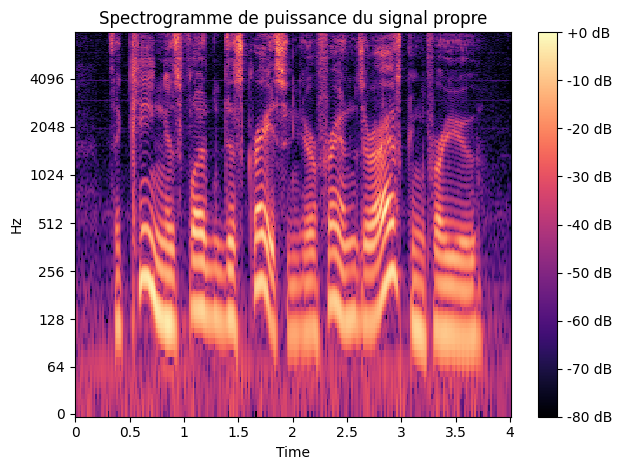

<Figure size 640x480 with 0 Axes>

In [52]:
# Calcul du spectrogramme du signal propre
stft_y_raw = librosa.stft(y_raw, n_fft=param_stft.n_fft, hop_length=param_stft.hop_length, win_length=param_stft.n_window, window=param_stft.window)

# Affichage du spectrogramme du signal propre
plt.figure()
librosa.display.specshow(librosa.amplitude_to_db(stft_y_raw, ref=np.max), sr=sr, hop_length=param_stft.hop_length, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogramme de puissance du signal propre')
plt.tight_layout()
plt.figure()

C:\Users\torre\AppData\Local\Temp\ipykernel_6520\1864212814.py:6: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(stft_y_signal_noise, ref=np.max), sr=sr, hop_length=param_stft.hop_length, x_axis='time', y_axis='log')


<Figure size 640x480 with 0 Axes>

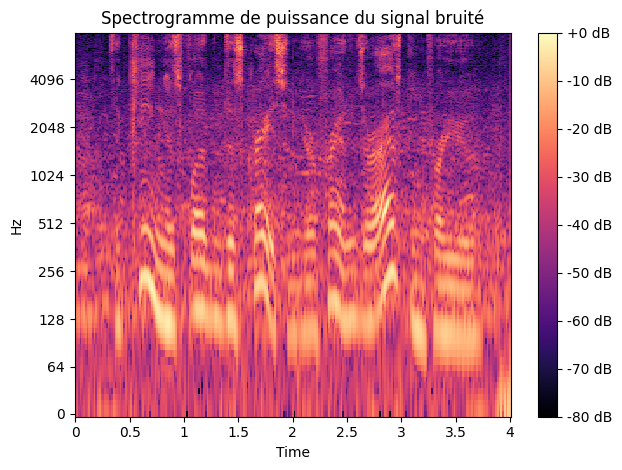

<Figure size 640x480 with 0 Axes>

In [53]:
# Calcul du spectrogramme du signal bruité
stft_y_signal_noise = librosa.stft(y_signal_noise, n_fft=param_stft.n_fft, hop_length=param_stft.hop_length, win_length=param_stft.n_window, window=param_stft.window)

# Affichage du spectrogramme du signal bruité
plt.figure()
librosa.display.specshow(librosa.amplitude_to_db(stft_y_signal_noise, ref=np.max), sr=sr, hop_length=param_stft.hop_length, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogramme de puissance du signal bruité')
plt.tight_layout()
plt.figure()

C:\Users\torre\AppData\Local\Temp\ipykernel_6520\712146227.py:3: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(signal_and_noise_with_mask, ref=np.max), sr=sr, hop_length=param_stft.hop_length, x_axis='time', y_axis='log')


<Figure size 640x480 with 0 Axes>

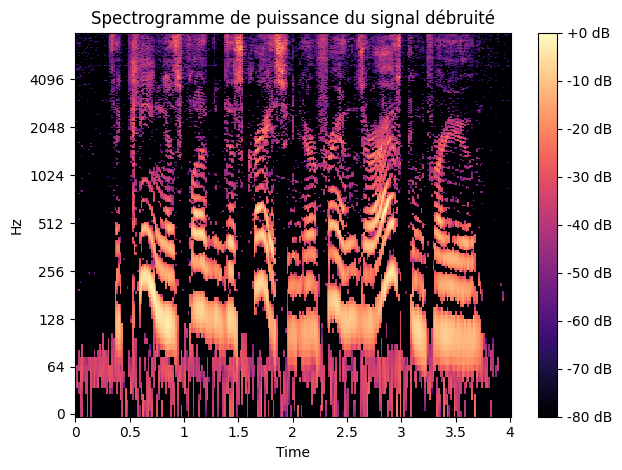

<Figure size 640x480 with 0 Axes>

In [54]:
# Affichage du spectrogramme du signal débruité
plt.figure()
librosa.display.specshow(librosa.amplitude_to_db(signal_and_noise_with_mask, ref=np.max), sr=sr, hop_length=param_stft.hop_length, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogramme de puissance du signal débruité')
plt.tight_layout()
plt.figure()

**Caclul du gain :**

In [55]:
SNR_in_raw = SNRin_dB(y_raw, y_signal_noise)

SDR_out_noised = SDRout_dB(y_raw, reconstructed_signal)

gain = gain(SNR_in_raw, SDR_out_noised)

print(f"gain : {gain} dB")

gain : 16.725355364400862 dB
